In [2]:
import numpy as np
import pandas as pd
import netCDF4 as nc
import xarray as xr

In [3]:
df = nc.Dataset('C:/Users/blaze/Documents/mywork/gcm_historical/axel_blaze_pr_WAS-44_CSIRO-QCCCE-CSIRO-Mk3-6-0_RegCM4-4_historical_mon_37N-97E_8N-68E_19510116-20051216.nc')

In [4]:
print (df.variables)

OrderedDict([('time_bnds', <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bounds2)
    _ChunkSizes: [1 2]
unlimited dimensions: time
current shape = (660, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('time', <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    long_name: time
    standard_name: time
    units: days since 1949-12-01 00:00:00
    calendar: 365_day
    _ChunkSizes: 1
    axis: T
unlimited dimensions: time
current shape = (660,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('y', <class 'netCDF4._netCDF4.Variable'>
float64 y(y)
    long_name: y-coordinate in Cartesian system
    standard_name: projection_y_coordinate
    units: m
    _CoordinateAxisType: GeoY
    _ChunkSizes: 167
    axis: Y
unlimited dimensions: 
current shape = (71,)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('x', <class 'netCDF4._netCDF4.Variable'>
float64 x(x)
    long_name: x-coordinate in Cartesian

In [5]:
lon    = df.variables['lon'][:]
lat    = df.variables['lat'][:]
nctime = df.variables['time'][:]
t_unit = df.variables['time'].units
pr    = df.variables['pr'][:]

In [6]:
pr = pr*86400

In [7]:
lat_name = 'lat'
lon_name = 'lon'
time_name = 'time'
data_name = 'pr'

In [8]:
#NWI = [69.48, 84.67, 23.06, 37.8]-----> (lat= 36:68 , lon=2:31)
#NEI = [84.67, 97.25, 21.54, 29.4]----->(lat=33: 49 , lon =35:54 )
#CEI = [68.19, 87.484, 14.898,26.87]------>(lat =18:43 , lon=0:37)
#SPI = [74.09,84.77, 8,19.92]------>(lat =0: 27, lon=12:31)

df.variables[lat_name][48,:]

masked_array(data=[29.36153603, 29.36425018, 29.36587906, 29.36642265,
                   29.36587906, 29.36425018, 29.36153603, 29.35773659,
                   29.35285187, 29.34688377, 29.3398304 , 29.33169365,
                   29.32247353, 29.31217384, 29.30079269, 29.28833008,
                   29.27479172, 29.2601738 , 29.24448013, 29.22771454,
                   29.2098732 , 29.19096184, 29.17098045, 29.14993286,
                   29.12781906, 29.10464096, 29.08040047, 29.0551033 ,
                   29.02874756, 29.00133705, 28.9728756 , 28.94336319,
                   28.91280556, 28.88120461, 28.84856224, 28.81488037,
                   28.78016472, 28.74441719, 28.7076416 , 28.66984177,
                   28.63101768, 28.59117699, 28.55032158, 28.50845528,
                   28.46558189, 28.42170334, 28.37682724, 28.33095551,
                   28.28409195, 28.23624039, 28.18740654, 28.13759422,
                   28.08680725, 28.03505135, 27.98233032],
             mask=

In [9]:
NWI_data = df.variables[data_name][:,36:68, 2:31]
NEI_data = df.variables[data_name][:,33:49, 35:54]
CEI_data = df.variables[data_name][:,18:43, 0:37]
SPI_data = df.variables[data_name][:,0:27, 12:31]

In [10]:
SPI_data.shape

(660, 27, 19)

In [11]:
NWI_data = np.reshape(NWI_data, (12,55,32,29), order='F')
NEI_data = np.reshape(NEI_data, (12,55,16,19), order='F')
CEI_data = np.reshape(CEI_data, (12,55,25,37), order='F')
SPI_data = np.reshape(SPI_data, (12,55,27,19), order='F')


In [12]:
NWI_data = np.transpose(NWI_data, (1, 0, 2, 3))
NEI_data = np.transpose(NEI_data, (1, 0, 2, 3))
CEI_data = np.transpose(CEI_data, (1, 0, 2, 3))
SPI_data = np.transpose(SPI_data, (1, 0, 2, 3))


In [13]:
NWI_mean = np.mean(NWI_data, axis=0)
NEI_mean = np.mean(NEI_data, axis=0)
CEI_mean = np.mean(CEI_data, axis=0)
SPI_mean = np.mean(SPI_data, axis=0)


In [14]:
temp11 = np.reshape(NWI_data,(55,12,32*29), order='F')
temp12 = np.reshape(NEI_data,(55,12,16*19), order='F')
temp13 = np.reshape(CEI_data,(55,12,25*37), order='F')
temp14 = np.reshape(SPI_data,(55,12,27*19), order='F')


In [15]:
temp21 = np.mean(temp11, axis=2); 
temp22 = np.mean(temp12, axis=2); 
temp23 = np.mean(temp13, axis=2); 
temp24 = np.mean(temp14, axis=2); 


In [16]:
NWI_series = np.reshape(temp21.T,(12*55,1), order='F'); 
NEI_series = np.reshape(temp22.T,(12*55,1), order='F'); 
CEI_series = np.reshape(temp23.T,(12*55,1), order='F'); 
SPI_series = np.reshape(temp24.T,(12*55,1), order='F'); 


In [17]:
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

In [18]:
time1 = pd.date_range(start='1/1/1950', end='12/1/2004',freq='MS').to_pydatetime()
        


In [19]:
time1.size

660

In [20]:
NWI_series = NWI_series * 86400
NEI_series = NEI_series * 86400
CEI_series = CEI_series * 86400
SPI_series = SPI_series * 86400

In [26]:
a = [1,2,3,4,5,6,7,8,9,10]
sum1 = a.expanding(min_periods=3).mean()

AttributeError: 'list' object has no attribute 'expanding'

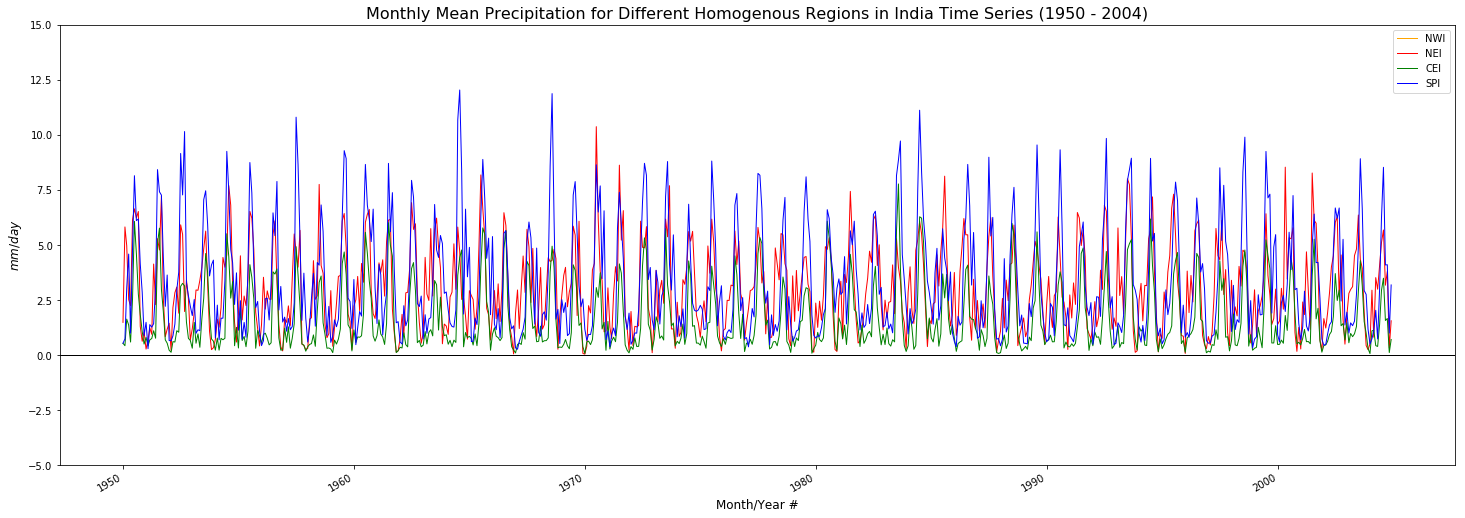

In [105]:
fig, ax = plt.subplots(1, 1 , figsize=(25,10))

ax.plot(time1, NWI_series, color='orange', linewidth=1, label='NWI')
ax.plot(time1, NEI_series,  color='red', linewidth=1, label='NEI')
ax.plot(time1, CEI_series,  color='green', linewidth=1, label='CEI')
ax.plot(time1, SPI_series,  color='blue', linewidth=1, label='SPI')

ax.axhline(0, linewidth=1, color='k')
ax.legend()
ax.set_title('Monthly Mean Precipitation for Different Homogenous Regions in India Time Series (1950 - 2004)', fontsize=16)
ax.set_xlabel('Month/Year #', fontsize=12)
ax.set_ylabel('$mm/day$', fontsize=12)
ax.set_ylim(-5.0, 15.0)
fig.set_figheight(9)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y')

In [106]:
#Finding Anomaly in the precipitation data from mean

In [111]:
NWI_mean = np.mean(NWI_data, axis=0)
NEI_mean = np.mean(NEI_data, axis=0)
CEI_mean = np.mean(CEI_data, axis=0)
SPI_mean = np.mean(SPI_data, axis=0)

In [112]:
NWI_mean.shape

(12, 32, 29)

In [113]:
num_repeats = 55 # 30 years
NWI_mean = np.vstack([NWI_mean]*num_repeats)
NEI_mean = np.vstack([NEI_mean]*num_repeats)
CEI_mean = np.vstack([CEI_mean]*num_repeats)
SPI_mean = np.vstack([SPI_mean]*num_repeats)
NWI_mean.shape

(660, 32, 29)

In [114]:
NWI_mean = np.reshape(NWI_mean, (12,55,32,29),order='F')
NEI_mean = np.reshape(NEI_mean, (12,55,16,19), order='F')
CEI_mean = np.reshape(CEI_mean, (12,55,25,37), order='F')
SPI_mean = np.reshape(SPI_mean, (12,55,27,19), order='F')

In [115]:
NWI_mean = np.transpose(NWI_mean, (1, 0, 2, 3))
NEI_mean = np.transpose(NEI_mean, (1, 0, 2, 3))
CEI_mean = np.transpose(CEI_mean, (1, 0, 2, 3))
SPI_mean = np.transpose(SPI_mean, (1, 0, 2, 3))


In [117]:
NWI_mean = NWI_mean *86400
NEI_mean = NEI_mean *86400
CEI_mean = CEI_mean *86400
SPI_mean = SPI_mean *86400


In [119]:
NWI_a  = NWI_data-NWI_mean
NEI_a  = NEI_data-NEI_mean
CEI_a  = CEI_data-CEI_mean
SPI_a  = SPI_data-SPI_mean


In [120]:
temp11 = np.reshape(NWI_a,(55,12,32*29), order='F')
temp12 = np.reshape(NEI_a,(55,12,16*19), order='F')
temp13 = np.reshape(CEI_a,(55,12,25*37), order='F')
temp14 = np.reshape(SPI_a,(55,12,27*19), order='F')


In [121]:
temp21 = np.mean(temp11, axis=2); 
temp22 = np.mean(temp12, axis=2); 
temp23 = np.mean(temp13, axis=2); 
temp24 = np.mean(temp14, axis=2); 


In [122]:
NWI_anomaly = np.reshape(temp21.T,(12*55,1), order='F'); 
NEI_anomaly = np.reshape(temp22.T,(12*55,1), order='F'); 
CEI_anomaly = np.reshape(temp23.T,(12*55,1), order='F'); 
SPI_anomaly = np.reshape(temp24.T,(12*55,1), order='F'); 


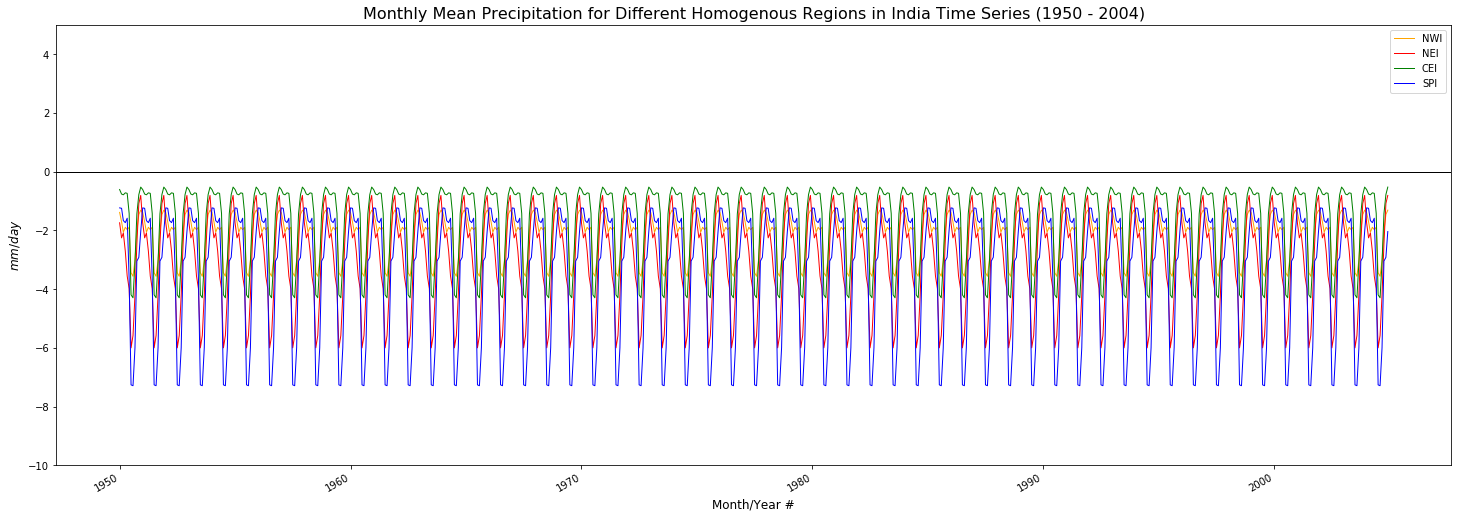

In [124]:
fig, ax = plt.subplots(1, 1 , figsize=(25,10))

ax.plot(time1, NWI_anomaly, color='orange', linewidth=1, label='NWI')
ax.plot(time1, NEI_anomaly,  color='red', linewidth=1, label='NEI')
ax.plot(time1, CEI_anomaly,  color='green', linewidth=1, label='CEI')
ax.plot(time1, SPI_anomaly,  color='blue', linewidth=1, label='SPI')

ax.axhline(0, linewidth=1, color='k')
ax.legend()
ax.set_title('Monthly Mean Precipitation for Different Homogenous Regions in India Time Series (1950 - 2004)', fontsize=16)
ax.set_xlabel('Month/Year #', fontsize=12)
ax.set_ylabel('$mm/day$', fontsize=12)
ax.set_ylim(-10.0, 5.0)
fig.set_figheight(9)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
# use a more precise date string for the x axis locations in the toolbar
ax.fmt_xdata = mdates.DateFormatter('%Y')

In [20]:
#Wavelet analysis using Welch Technique

In [27]:
len(NWI_series)

660

In [28]:
from scipy import signal
import matplotlib.pyplot as plt
#Generate a test signal, a 2 Vrms sine wave at 1234 Hz, corrupted by 0.001 V**2/Hz of white noise sampled at 10 kHz.

